<a href="https://colab.research.google.com/github/Hema-Nayak/Task2_Real-time-mask-detetction/blob/main/facemaskpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hemanayak","key":"c8c176afcdceeea14d72d5b603dfe88b"}'}

In [3]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 94% 195M/207M [00:01<00:00, 113MB/s] 
100% 207M/207M [00:01<00:00, 114MB/s]


In [ ]:
!unzip \*.zip


In [6]:

for dirpath,dirnames,filenames in os.walk("/content/New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/New Masks Dataset'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.


In [7]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img


['207.jpg']
image shape (225, 225, 3)


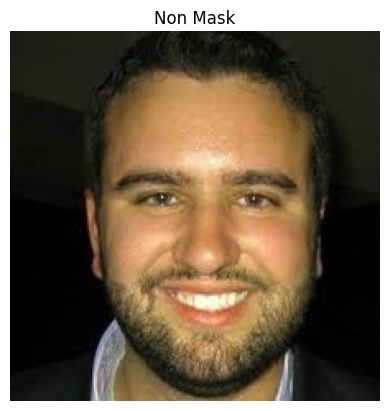

In [8]:

img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['0241.jpg']
image shape (1024, 1024, 3)


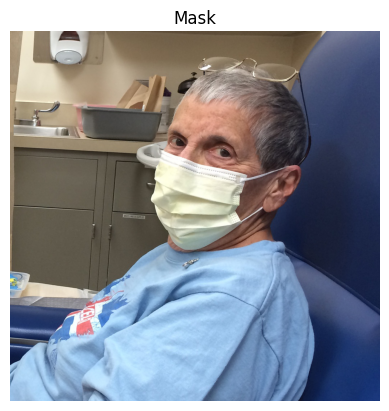

In [9]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

In [10]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/New Masks Dataset/Test/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [11]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/New Masks Dataset/Test/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [12]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [13]:

data.shape

(700, 224, 224, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)

In [17]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False


model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
model.fit(X_train, y_train, epochs=15,validation_split= 0.1, batch_size=32)

Epoch 1/15
18/18 [==============================] - 12s 137ms/step - loss: 0.4156 - accuracy: 0.8871 - val_loss: 0.0308 - val_accuracy: 0.9841
Epoch 2/15
18/18 [==============================] - 1s 49ms/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 3/15
18/18 [==============================] - 1s 48ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4/15
18/18 [==============================] - 1s 50ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 5/15
18/18 [==============================] - 1s 50ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 6/15
18/18 [==============================] - 1s 50ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 7/15
18/18 [==============================] - 1s 45ms/step - loss: 8.9534e-04 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 8

In [19]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)


3/3 [==============================] - 1s 205ms/step


In [20]:
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])


,No Mask,Mask
No Mask,35,0
Mask,0,35


In [21]:
model_name = "/content/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)